Read blog about 'Bert' and 'Transformers' here:

Bert:
https://cognosage.blogspot.com/2024/02/understanding-bert-for-beginners.html

Transformers:
https://cognosage.blogspot.com/2024/02/understanding-transformers-detailed.html




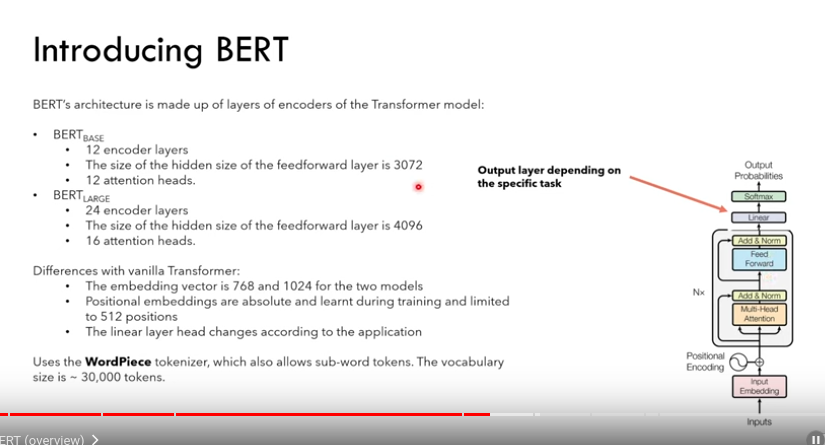

In [ ]:
import torch
import torch.nn as nn

class BERTEmbedding(nn.Module):
    def __init__(self,
                 vocab_size,
                 n_segments,
                 max_len,
                 embed_dim,
                 dropout):
        super().__init__()
        #token embedding
        self.tok_embed = nn.Embedding(vocab_size, embed_dim)
        #segment embedding
        self.seg_embed = nn.Embedding(n_segments, embed_dim)
        #position embedding
        self.pos_embed = nn.Embedding(max_len, embed_dim)

        self.drop = nn.Dropout(dropout)
        self.pos_inp = torch.tensor([i for i in range(max_len)],)

    def forward(self, seq, seg):
        embed_val = self.tok_embed(seq) + self.seg_embed(seg) + self.pos_embed(self.pos_inp)
        embed_val = self.drop(embed_val)
        return embed_val



Explanation:

    BERTEmbedding class creates embeddings for tokens, segments, and positions.
    Token embeddings capture the meaning of words, segment embeddings distinguish different segments, and position embeddings maintain the order of words in a sequence.

In [ ]:

class BERT(nn.Module):
    def __init__(self,
                 vocab_size,
                 n_segments,
                 max_len,
                 embed_dim,
                 n_layers,
                 attn_heads,
                 dropout):
        super().__init__()
        self.embedding = BERTEmbedding(vocab_size, n_segments, max_len, embed_dim, dropout)
        self.encoder_layer = nn.TransformerEncoderLayer(embed_dim, attn_heads, embed_dim*4)
        self.encoder_block = nn.TransformerEncoder(self.encoder_layer, n_layers)

    def forward(self, seq, seg):
        out = self.embedding(seq, seg)
        out = self.encoder_block(out)
        return out



Explanation:

    BERT class utilizes BERTEmbedding and Transformer Encoder layers to create a BERT model.
    Transformer Encoder layers capture contextual information and relationships between words.

In [ ]:

if __name__ == "__main__":
    VOCAB_SIZE = 30000
    N_SEGMENTS = 3
    MAX_LEN = 512
    EMBED_DIM = 768
    N_LAYERS = 12
    ATTN_HEADS = 12
    DROPOUT = 0.1

    sample_seq = torch.randint(high=VOCAB_SIZE, size=[MAX_LEN,])
    sample_seg = torch.randint(high=N_SEGMENTS, size=[MAX_LEN,])

    embedding = BERTEmbedding(VOCAB_SIZE, N_SEGMENTS, MAX_LEN, EMBED_DIM, DROPOUT)
    embedding_tensor = embedding(sample_seq, sample_seg)
    print(embedding_tensor.size())

    bert = BERT(VOCAB_SIZE, N_SEGMENTS, MAX_LEN, EMBED_DIM, N_LAYERS, ATTN_HEADS, DROPOUT)
    out = bert(sample_seq, sample_seg)
    print(out.size())

Explanation:

    This example demonstrates how to use the BERTEmbedding class to obtain embeddings for a sample input sequence and segments.
    The BERT model is then used to process the input and produce the final output tensor, capturing contextual information and relationships between words.